<a href="https://colab.research.google.com/github/shagufta24/image_augmentation/blob/main/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and installations

In [59]:
# Mount google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
# Install latest version of albumentations
!pip install -q -U albumentations

     |████████████████████████████████| 102 kB 5.2 MB/s 
     |████████████████████████████████| 47.8 MB 1.3 MB/s 


In [3]:
# Check opencv versions (should be same)
!pip freeze | grep opencv-python

opencv-python==4.1.2.30
opencv-python-headless==4.5.5.64


In [4]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [19]:
# Import required libraries
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import glob
import re
import numpy as np
import pandas as pd

## Helper functions

In [6]:
# Visualize the bounding boxes and image

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, height, width, color=(255,0,0), thickness=2):
    """Visualizes a single bounding box on the image"""
    x_center, y_center, w, h = bbox
    x_center *= width
    y_center *= height
    w *= width
    h *= height
    x_min, x_max, y_min, y_max = int(x_center-w/2), int(x_center + w/2), int(y_center-h/2), int(y_center + h/2)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img

In [7]:
# Visualize all boxes
def visualize(image, bboxes, category_ids, category_id_to_name, height, width):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name,height, width)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [8]:
# Testing visualize
image = cv2.imread("/content/gdrive/MyDrive/final_images/img1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# file = glob.glob("/content/gdrive/MyDrive/final_images/img1.txt")
# df = pd.read_table(file, delimiter=" ")
# classes = df.iloc[:,0]
# df = df.drop(df.columns[0], axis=1)
# arr = df.to_numpy()
# bboxes = arr.tolist()
bboxes = [[0.676758, 0.782552, 0.224609, 0.427083],[0.080566, 0.569661, 0.159180, 0.194010],[0.352539, 0.197266, 0.115234, 0.134115]]
category_ids = [2, 5, 5]
category_id_to_name = {0: 'bed', 1: 'phone', 2: 'chair',3: 'lamp', 4: 'bottle', 5: 'bag', 6: 'cup'}
visualize(image, bboxes, category_ids, category_id_to_name, height, width)

## Augmentations

In [77]:
# Create transformation pipeline
transform = A.Compose([
    A.Blur(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.RandomContrast(p=0.5),
    A.MotionBlur(blur_limit=(3,10), p=0.2),
    A.RGBShift(p=0.2),
    A.GaussNoise(p=0.6)
], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'], min_area=0))

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:1828: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [78]:
# Path to access images and bboxes
path_to_images = "/content/gdrive/MyDrive/final_images/img1.txt"
print(path_to_images)

/content/gdrive/MyDrive/final_images/img1.txt


In [79]:
category_id_to_name = {0: 'laptop', 1: 'mug', 2: 'phone',3: 'slippers', 4: 'bed', 5: 'bottle', 6: 'chair', 7:'table', 8:'bag', 9:'bedside_table', 10:'pillow', 11:'table_lamp'}

def augment(input_path, output_path):
  count = 0
# Iterate over all .txt files
  for f in glob.glob(input_path):

    # Read class and bounding boxes data in a df
    df = pd.read_table(f, delimiter=" ")
    # Extract labels to a list
    category_ids = df.iloc[:,0].to_numpy().tolist()
    # List of bounding boxes
    bboxes = df.iloc[:,1:].to_numpy().tolist()

    # Image file with the same name as .txt file
    image_file = re.sub(".txt",".jpeg",f,1)
    # Read the image
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Find image dimensions
    height = image.shape[0]
    width = image.shape[1]

    # Visualize original image
    visualize(image, bboxes, category_ids, category_id_to_name, height, width)
    # Apply transformation
    for i in range(5):
      transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
      transformed_image = transformed['image']
      transformed_bboxes = transformed['bboxes']
      # Visualize new image
      visualize(transformed_image, transformed_bboxes, category_ids, category_id_to_name, height, width)
      # Save the image
      transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR)
      img_name = output_path + 'img' + str(count) + '.jpeg'
      cv2.imwrite(img_name, transformed_image)
      count += 1

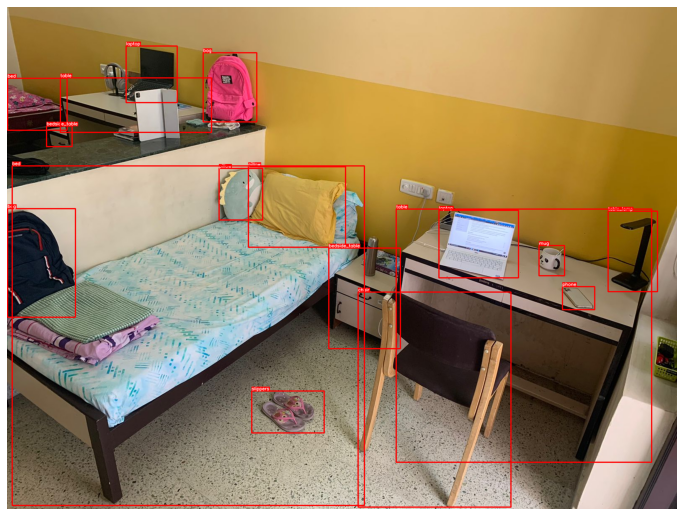

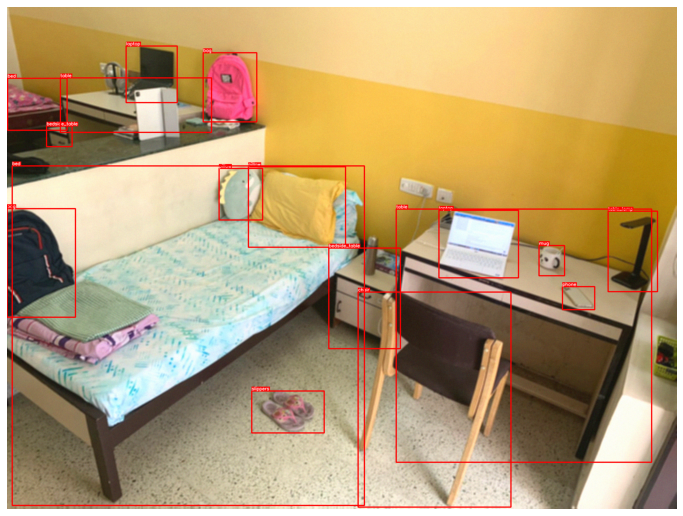

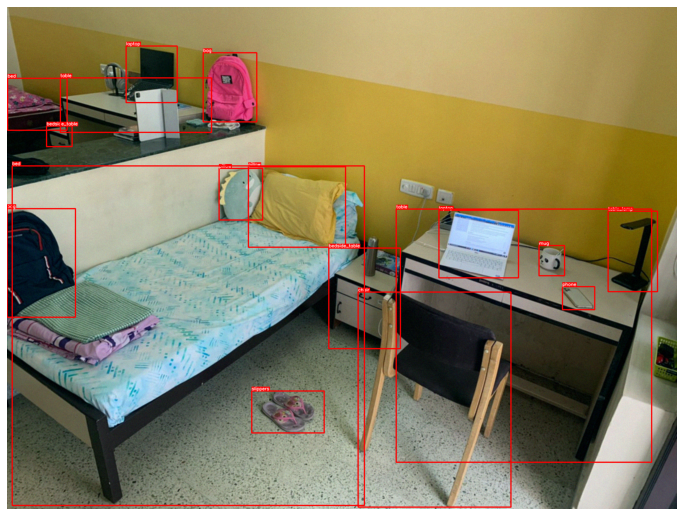

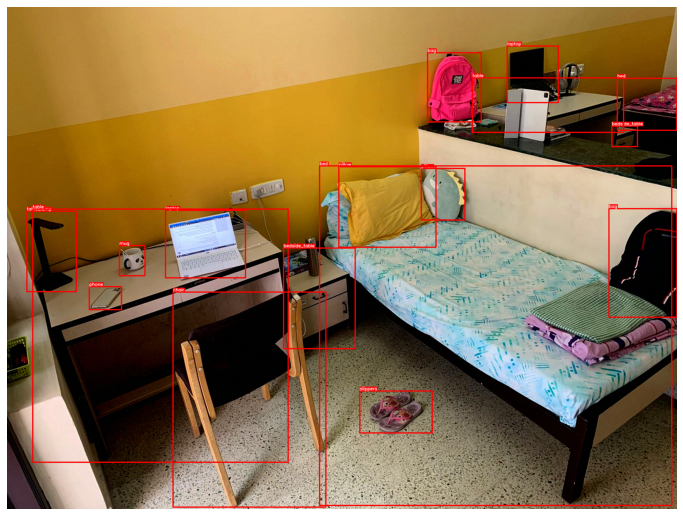

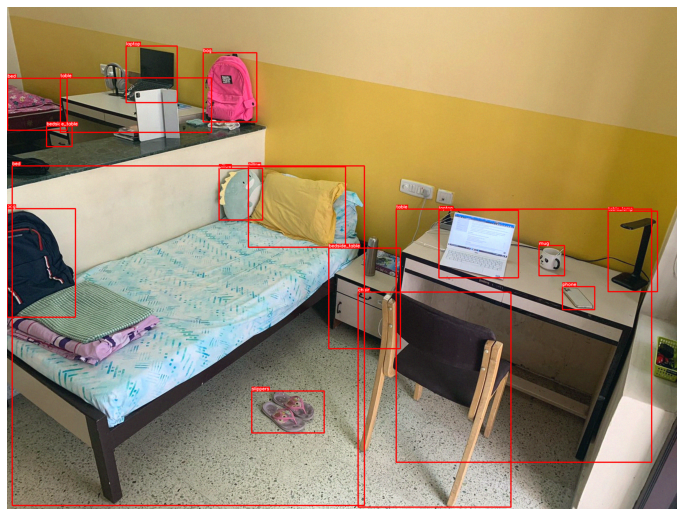

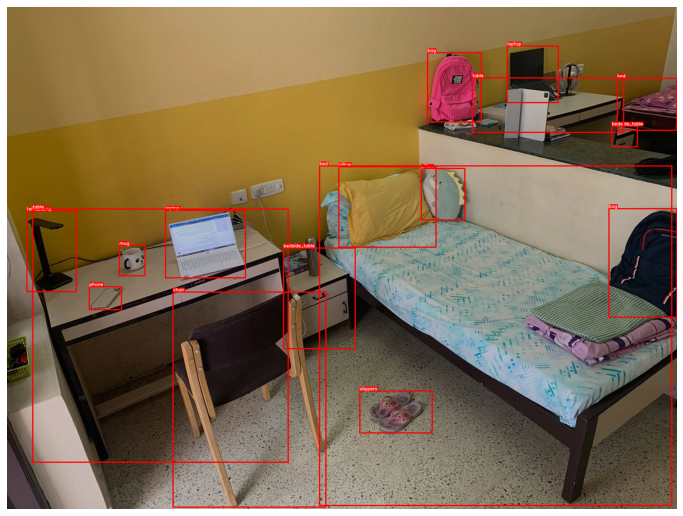

In [80]:
output_path = "/content/gdrive/MyDrive/final_images/output/"
augment(path_to_images, output_path)

## Testing stuff

In [ ]:
# Read image
image = cv2.imread("/content/gdrive/MyDrive/final_images/img.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Bounding box
bboxes = [[0.676758, 0.782552, 0.224609, 0.427083, 2]]

In [ ]:
# Apply transformation
transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [ ]:
transformed_bboxes

In [ ]:
list_of_lists = []
# Iterate over all .txt files
for file in glob.glob(path_to_images):
  # Read class and bounding boxes data in a df
   df = pd.read_table(file, delimiter=" ")
  # List of class + bounding boxes
   original_list = df.to_numpy().tolist()
  # Append to list of bounding boxes of all images
   list_of_lists.append(original_list)

In [ ]:
#Bounding box locations...................
def val_for_key(my_dict,val) :
  return (list(my_dict.keys())[list(my_dict.values()).index(val)])



In [ ]:
#making polygon co-ordinates....
def get_pol_Coords(x_centre,y_centre,w,h,width,height):
  x_centre *= width
  y_centre *= height
  w *= width
  h *= height
  Coords_list = [int(x_centre - w/2),int(y_centre + h/2),int(x_centre + w/2),int(y_centre + h/2),int(x_centre - w/2),int(y_centre - h/2), int(x_centre + w/2),int(y_centre - h/2)]
  return Coords_list

In [ ]:
import shapely
from shapely.geometry import Polygon,MultiPoint


def calculate_iou(line1, line2):
    a = np.array(line1).reshape(4, 2) # quadrilateral two-dimensional coordinate representation
    poly1 = Polygon(a).convex_hull # python quadrilateral object, will automatically calculate four points, the last four points in the order of: top left bottom right bottom right top left top
    # print(Polygon(a).convex_hull) # you can print to see if this is the case

    
    # line2=[1,1,4,1,4,4,1,4]
    b=np.array(line2).reshape(4, 2)
    poly2 = Polygon(b).convex_hull
    # print(Polygon(b).convex_hull)
    
    union_poly = np.concatenate((a,b))   #Merge two box coordinates to become 8*2
    #print(union_poly)
    # print(MultiPoint(union_poly).convex_hull) # contains the smallest polygon point of the two quadrilaterals
    if not poly1.intersects(poly2): #If the two quadrilaterals do not intersect
        iou = 0
    else:
        try:
            inter_area = poly1.intersection(poly2).area #intersection area
            # print(inter_area)
            #union_area = poly1.area + poly2.area - inter_area
            union_area = MultiPoint(union_poly).convex_hull.area
            # print(union_area)
            if union_area == 0:
                iou= 0
            iou=float(inter_area)/union_area
            # The source code gives two ways to calculate IOU, the first one is: intersection part / area of the smallest polygon containing two quadrilaterals  
            # The second one: intersection/merge (common way to calculate IOU of rectangular box) 
        except shapely.geos.TopologicalError:
            print('shapely.geos.TopologicalError occured, iou set to 0')
            iou = 0
    return iou

In [ ]:
val = "Cup"
#Getting the values for the required key
key = val_for_key(category_id_to_name,val)
# print(key)
#Intializing the list for storing the bounding box values for the key object
Targ_list = []
#Iterating over all images
for original_list in list_of_Lists:
  print('\n')
  #Iterating over all bounding boxes in an image to find the target bounding box
  for lists in original_list:
    # print(lists)
    if int(lists[0]) == key:
      Targ_list = lists
      # print(Targ_list)
      break
  #Converting the noramlised values of bounding boxes to actual pixel co-ordinates
  Ct_list = get_pol_Coords(Targ_list[1],Targ_list[2],Targ_list[3],Targ_list[4],width,height)
  # print(Ct_list)
  #Iterating over the bounding boxes again to find the box with maximum IOU
  for lists in original_list:
    if int(lists[0]) != key:
      Co_list = get_pol_Coords(lists[1],lists[2],lists[3],lists[4],width,height)
      J_Ind = calculate_iou(Ct_list,Co_list)
      if J_Ind !=0:
        item = category_id_to_name.get(lists[0])
        print(item)
      # print(J_Ind)
        



IndexError: ignored